# <span style="color:rgb(255, 0, 255)">This document contains the main areas studied in this unit</span> 

<span style="color:rgb(255, 0, 255)">Steps have been reviewed with feedback of the labs by the TAs and inspiration from the exercises of other students</span> 

### <span style="color:rgb(255, 0, 255)">--- Import the necessary libraries</span>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.ticker as mk
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression

import os #we will use the function listdir to list files in a folder
import math #to apply absolute value

### <span style="color:rgb(255, 0, 255)">--- Load the database</span>

In [3]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
data.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

### <span style="color:rgb(255, 0, 255)">--- Let's look at its main features (head, shape, info).

In [3]:
data.shape

(9134, 24)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
data.describe()

Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

In [6]:
#let's see first if we have any duplicated rows with nan values in those rows aka no info in that entry
duplicate_rows = data[data.duplicated()]
duplicate_rows

Empty DataFrame
Columns: [Customer, State, Customer Lifetime Value, Response, Coverage, Education, Effective To Date, EmploymentStatus, Gender, Income, Location Code, Marital Status, Monthly Premium Auto, Months Since Last Claim, Months Since Policy Inception, Number of Open Complaints, Number of Policies, Policy Type, Policy, Renew Offer Type, Sales Channel, Total Claim Amount, Vehicle Class, Vehicle Size]
Index: []

In [7]:
data.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

### <span style="color:rgb(255, 0, 255)">--- Put the columns names on point

In [8]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [9]:
cols = [col_name.lower().replace(' ', '_') for col_name in data]
data.columns = cols
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### <span style="color:rgb(255, 0, 255)">--- Drop columns that we don't longer need

In [10]:
data = data.drop(['customer'], axis=1)
data.head() #we don't need customer for the model because is an ID

state  customer_lifetime_value response  coverage education  \
0  Washington              2763.519279       No     Basic  Bachelor   
1     Arizona              6979.535903       No  Extended  Bachelor   
2      Nevada             12887.431650       No   Premium  Bachelor   
3  California              7645.861827       No     Basic  Bachelor   
4  Washington              2813.692575       No     Basic  Bachelor   

  effective_to_date employmentstatus gender  income location_code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  marital_status  monthly_premium_auto  months_since_last_claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   months_since_policy_inception  number_of_open_complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   number_of_policies     policy_type        policy renew_offer_type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  sales_channel  total_claim_amount  vehicle_class vehicle_size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

### <span style="color:rgb(255, 0, 255)">--- Check for the format of date columns</span>

In [11]:
data["effective_to_date"] = pd.to_datetime(data["effective_to_date"], errors='coerce')

In [12]:
data["effective_to_date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9134 entries, 0 to 9133
Series name: effective_to_date
Non-Null Count  Dtype         
--------------  -----         
9134 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 71.5 KB


### <span style="color:rgb(255, 0, 255)">--- Load the continuous and discrete variables into numericals and categorical variables</span>

In [13]:
num = data.select_dtypes(include = np.number)
num = num.drop('total_claim_amount', axis=1)
cat = data.select_dtypes(include = np.object)
target = data['total_claim_amount']

In [14]:
num.head()

customer_lifetime_value  income  monthly_premium_auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   months_since_last_claim  months_since_policy_inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   number_of_open_complaints  number_of_policies  
0                          0                   1  
1                          0                   8  
2                          0                   2  
3                          0                   7  
4                          0                   1

In [15]:
cat.head()

state response  coverage education employmentstatus gender  \
0  Washington       No     Basic  Bachelor         Employed      F   
1     Arizona       No  Extended  Bachelor       Unemployed      F   
2      Nevada       No   Premium  Bachelor         Employed      F   
3  California       No     Basic  Bachelor       Unemployed      M   
4  Washington       No     Basic  Bachelor         Employed      M   

  location_code marital_status     policy_type        policy renew_offer_type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer1   
1      Suburban         Single   Personal Auto   Personal L3           Offer3   
2      Suburban        Married   Personal Auto   Personal L3           Offer1   
3      Suburban        Married  Corporate Auto  Corporate L2           Offer1   
4         Rural         Single   Personal Auto   Personal L1           Offer1   

  sales_channel  vehicle_class vehicle_size  
0         Agent   Two-Door Car      Medsize  
1         Agent  Four-Door Car      Medsize  
2         Agent   Two-Door Car      Medsize  
3   Call Center            SUV      Medsize  
4         Agent  Four-Door Car      Medsize

### <span style="color:rgb(255, 0, 255)"> --- Feature selection

</span>

<span style="color:rgb(255, 0, 255)"> The goal of feature selection is to improve model accuracy by reducing the number of irrelevant or redundant features that may introduce noise or bias in the model.

In [16]:
#Inspired by Luis's Code
#Check unique values for each categorical value
for column in cat.columns:
    print('─' * 10)
    print("This feature ", '\033[1m' + column + '\033[0m' ," has ", cat[column].nunique(), " categories \n The single values are: ", cat[column].unique(),"\n" )
    print("Here the detail: \n" , cat[column].value_counts())
    print("\n\n")

──────────
This feature  state  has  5  categories 
 The single values are:  ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon'] 

Here the detail: 
 California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64



──────────
This feature  response  has  2  categories 
 The single values are:  ['No' 'Yes'] 

Here the detail: 
 No     7826
Yes    1308
Name: response, dtype: int64



──────────
This feature  coverage  has  3  categories 
 The single values are:  ['Basic' 'Extended' 'Premium'] 

Here the detail: 
 Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64



──────────
This feature  education  has  5  categories 
 The single values are:  ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor'] 

Here the detail: 
 Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: in

In [17]:
#Clean the categorical variables and reduce the unique values

cat_temp= cat.copy() # make a copy in case we mess something up.

# Inspired by Luis's code: 
#Groupping education. High, medium and low
cat_temp['education_grouped'] = np.where(cat['education'] == 'High School or Below' ,"LOW",cat_temp['education'])
cat_temp['education_grouped'] = np.where(cat_temp['education_grouped'] == 'College' ,"MEDIUM",cat_temp['education_grouped'])
cat_temp['education_grouped'] = np.where((cat_temp['education_grouped'] == 'Bachelor') |(cat_temp['education_grouped'] == 'Master') |(cat_temp['education_grouped'] == 'Doctor') ,"HIGH",cat_temp['education_grouped'])

In [18]:
#Groupping employmentstatus. I try to make bigger groups. employed. unemployed and other
cat_temp['employmentstatus_grouped'] = np.where((cat_temp['employmentstatus'] == 'Medical Leave')|(cat_temp['employmentstatus'] == 'Disabled')| (cat_temp['employmentstatus'] == 'Retired'),"Other",cat_temp['employmentstatus'])
cat_temp.head()

state response  coverage education employmentstatus gender  \
0  Washington       No     Basic  Bachelor         Employed      F   
1     Arizona       No  Extended  Bachelor       Unemployed      F   
2      Nevada       No   Premium  Bachelor         Employed      F   
3  California       No     Basic  Bachelor       Unemployed      M   
4  Washington       No     Basic  Bachelor         Employed      M   

  location_code marital_status     policy_type        policy renew_offer_type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer1   
1      Suburban         Single   Personal Auto   Personal L3           Offer3   
2      Suburban        Married   Personal Auto   Personal L3           Offer1   
3      Suburban        Married  Corporate Auto  Corporate L2           Offer1   
4         Rural         Single   Personal Auto   Personal L1           Offer1   

  sales_channel  vehicle_class vehicle_size education_grouped  \
0         Agent   Two-Door Car      Medsize              HIGH   
1         Agent  Four-Door Car      Medsize              HIGH   
2         Agent   Two-Door Car      Medsize              HIGH   
3   Call Center            SUV      Medsize              HIGH   
4         Agent  Four-Door Car      Medsize              HIGH   

  employmentstatus_grouped  
0                 Employed  
1               Unemployed  
2                 Employed  
3               Unemployed  
4                 Employed

In [19]:
#Groupping VEHICLE_CLASS to diminish number of unique variables. Luxury. Sports Car. Four-Door Car includes SUV. Two-Door Car
cat_temp['vehicle_class_grouped'] = np.where(cat_temp['vehicle_class'] == 'SUV',"Four-Door Car",cat_temp['vehicle_class'])
cat_temp['vehicle_class_grouped'] = np.where((cat_temp['vehicle_class'] == 'Luxury SUV') | (cat_temp['vehicle_class'] == 'Luxury Car'),"Luxury",cat_temp['vehicle_class_grouped'])
cat_temp['vehicle_class_grouped'] = np.where(cat_temp['vehicle_class'] == 'Sports Car',"Two-Door Car",cat_temp['vehicle_class_grouped'])

In [20]:
# Here I put another way of doing this: 
policy_map = {
    'Personal L3': 'Personal',
    'Personal L2': 'Personal',
    'Personal L1': 'Personal',
    'Corporate L3': 'Corporate',
    'Corporate L2': 'Corporate',
    'Corporate L1': 'Corporate',
    'Special L2': 'Special',
    'Special L3': 'Special',
    'Special L1': 'Special'
}

# Apply the mapping function to create a new column named "policy_type"
cat_temp['policy_grouped'] = cat_temp['policy'].apply(lambda x: policy_map[x])
cat_temp.head()

state response  coverage education employmentstatus gender  \
0  Washington       No     Basic  Bachelor         Employed      F   
1     Arizona       No  Extended  Bachelor       Unemployed      F   
2      Nevada       No   Premium  Bachelor         Employed      F   
3  California       No     Basic  Bachelor       Unemployed      M   
4  Washington       No     Basic  Bachelor         Employed      M   

  location_code marital_status     policy_type        policy renew_offer_type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer1   
1      Suburban         Single   Personal Auto   Personal L3           Offer3   
2      Suburban        Married   Personal Auto   Personal L3           Offer1   
3      Suburban        Married  Corporate Auto  Corporate L2           Offer1   
4         Rural         Single   Personal Auto   Personal L1           Offer1   

  sales_channel  vehicle_class vehicle_size education_grouped  \
0         Agent   Two-Door Car      Medsize              HIGH   
1         Agent  Four-Door Car      Medsize              HIGH   
2         Agent   Two-Door Car      Medsize              HIGH   
3   Call Center            SUV      Medsize              HIGH   
4         Agent  Four-Door Car      Medsize              HIGH   

  employmentstatus_grouped vehicle_class_grouped policy_grouped  
0                 Employed          Two-Door Car      Corporate  
1               Unemployed         Four-Door Car       Personal  
2                 Employed          Two-Door Car       Personal  
3               Unemployed         Four-Door Car      Corporate  
4                 Employed         Four-Door Car       Personal

In [21]:
cat_final=cat_temp.drop(columns=['education', 'employmentstatus', 'policy', 'policy_type','vehicle_class'])
cat_final.head()

state response  coverage gender location_code marital_status  \
0  Washington       No     Basic      F      Suburban        Married   
1     Arizona       No  Extended      F      Suburban         Single   
2      Nevada       No   Premium      F      Suburban        Married   
3  California       No     Basic      M      Suburban        Married   
4  Washington       No     Basic      M         Rural         Single   

  renew_offer_type sales_channel vehicle_size education_grouped  \
0           Offer1         Agent      Medsize              HIGH   
1           Offer3         Agent      Medsize              HIGH   
2           Offer1         Agent      Medsize              HIGH   
3           Offer1   Call Center      Medsize              HIGH   
4           Offer1         Agent      Medsize              HIGH   

  employmentstatus_grouped vehicle_class_grouped policy_grouped  
0                 Employed          Two-Door Car      Corporate  
1               Unemployed         Four-Door Car       Personal  
2                 Employed          Two-Door Car       Personal  
3               Unemployed         Four-Door Car      Corporate  
4                 Employed         Four-Door Car       Personal

### <span style="color:rgb(255, 0, 255)">--- Visualize categoricals and numericals

</span>

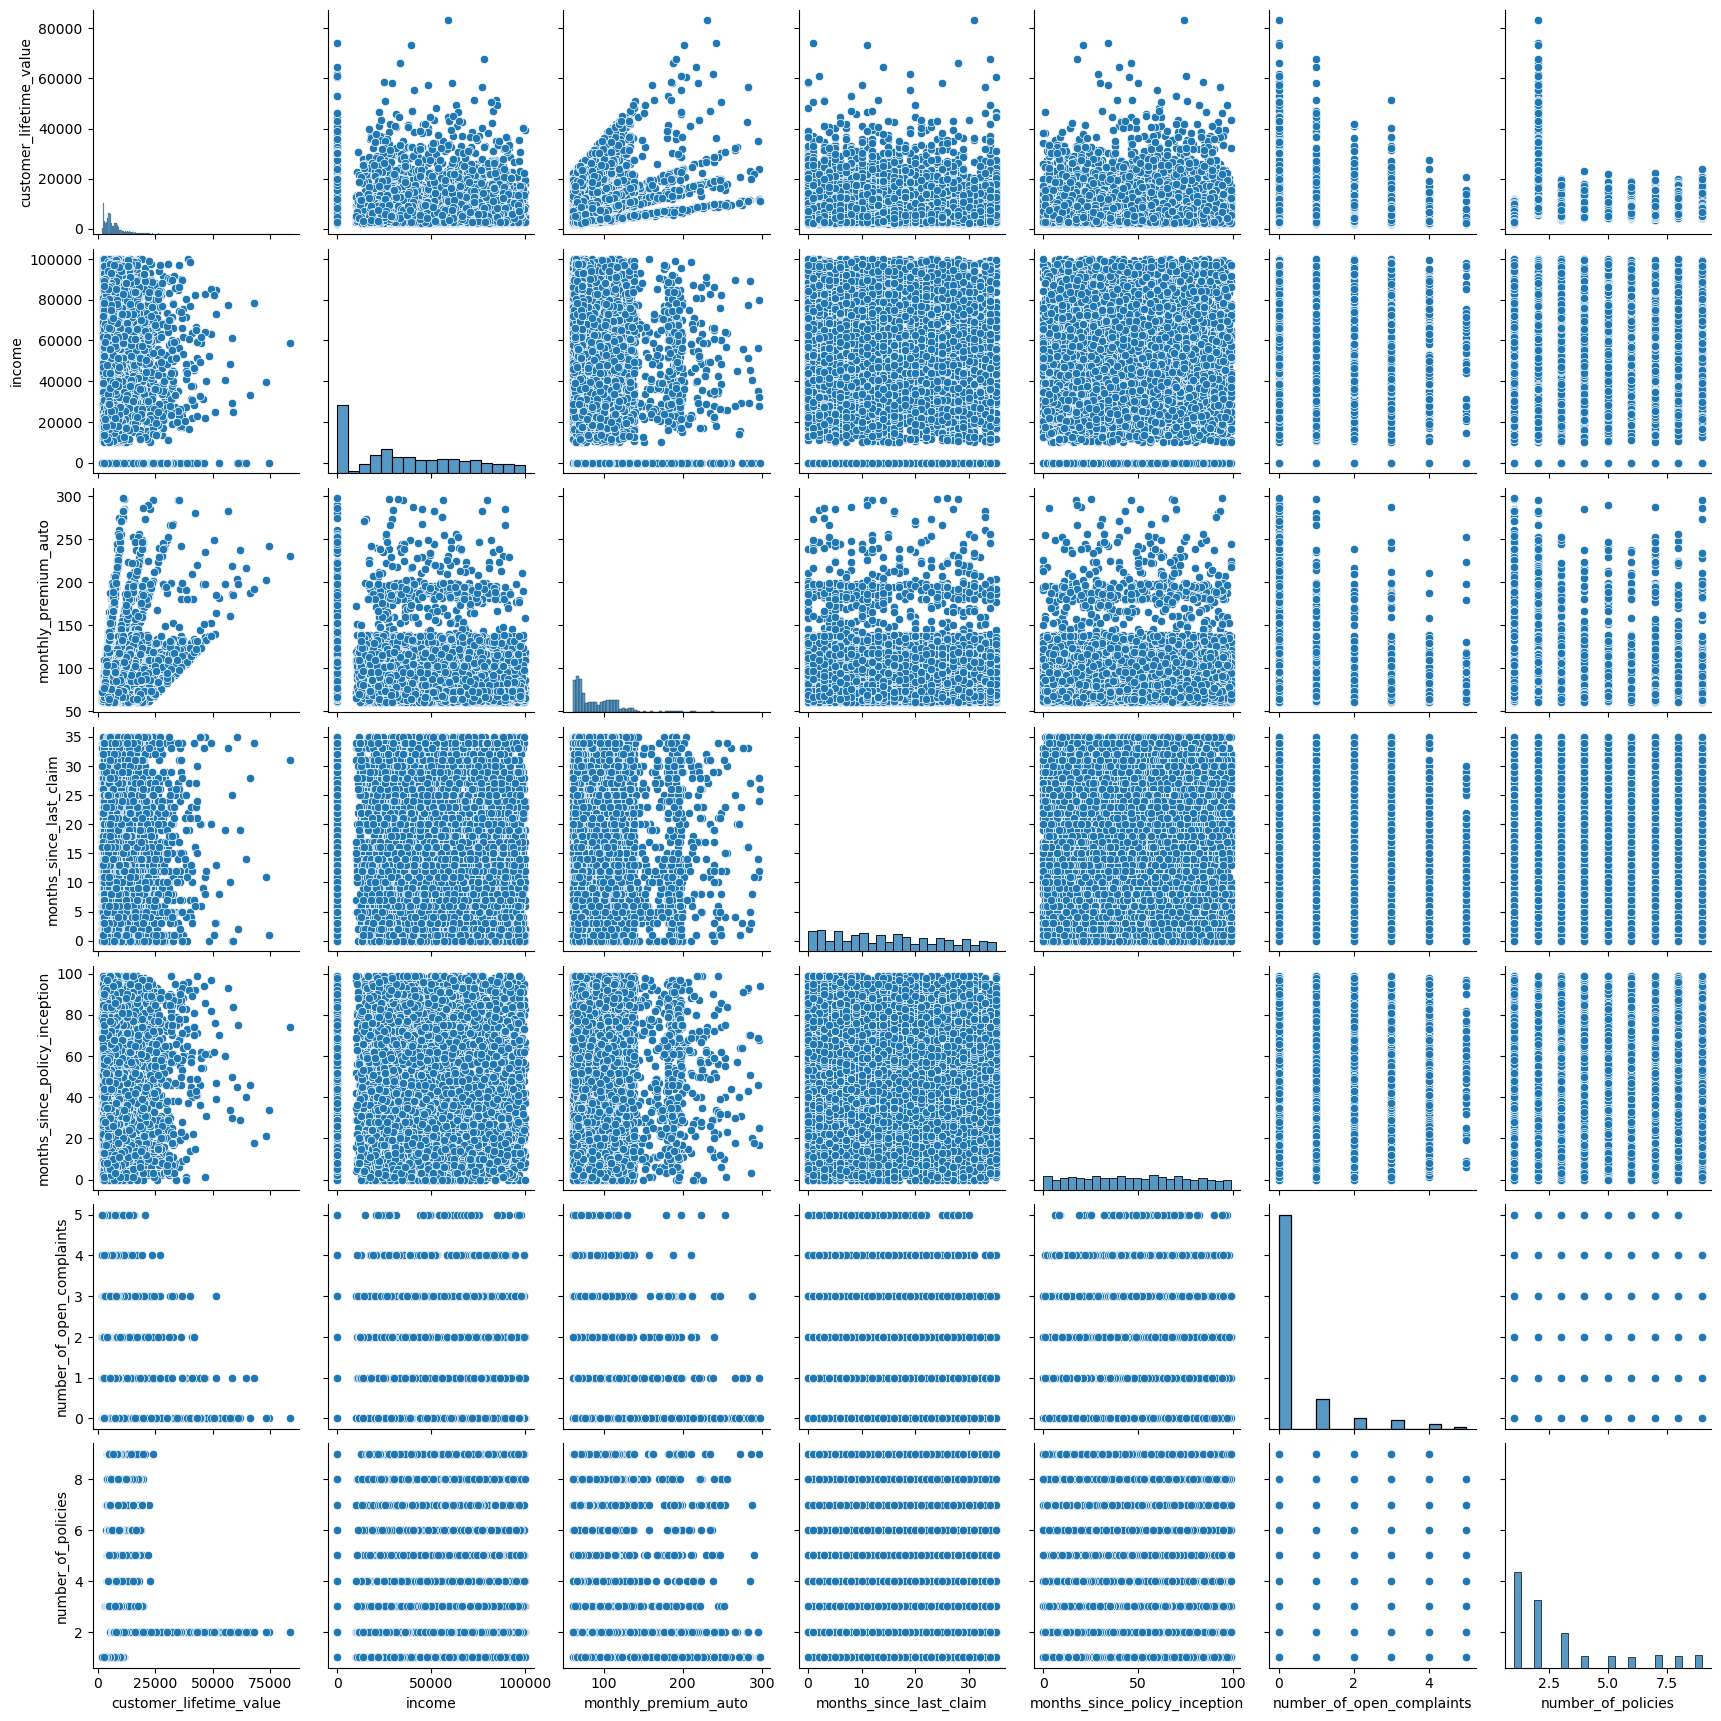

In [22]:
#Let's see how every numerical numbers correlate with others. 
sns.pairplot(num)

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

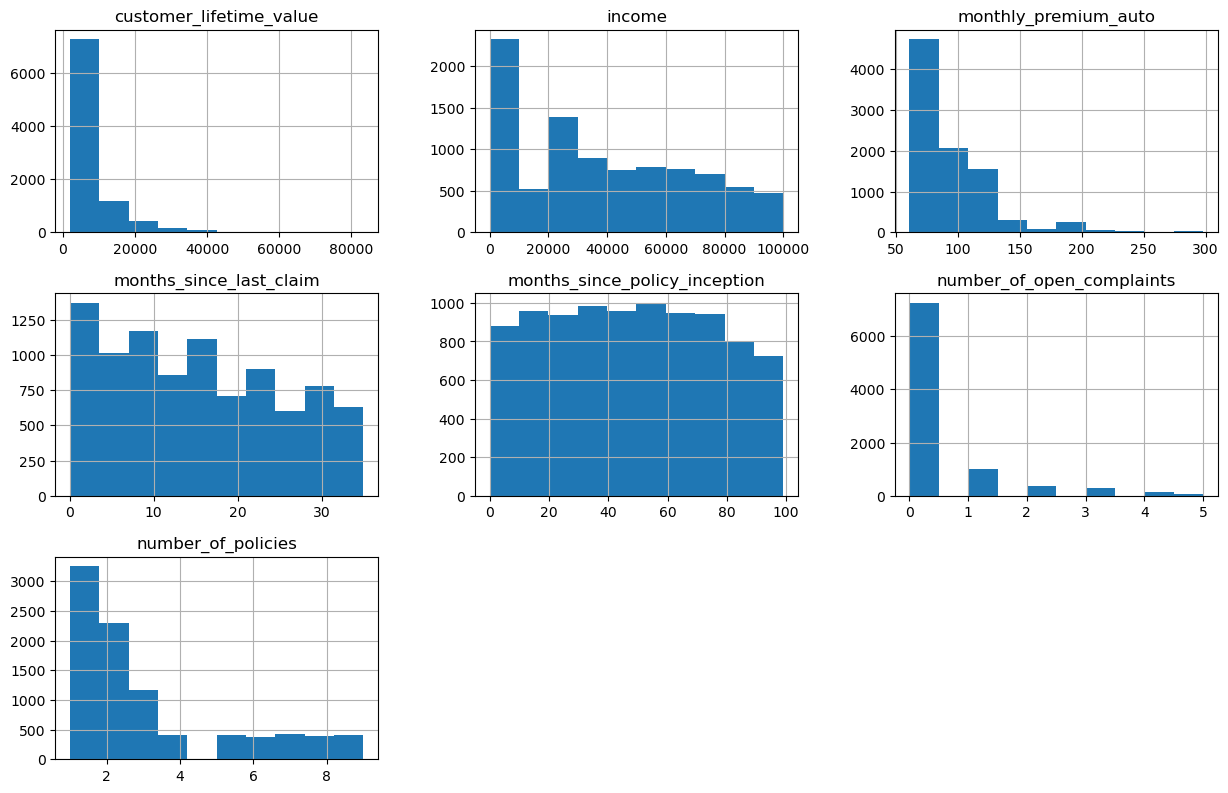

In [23]:
# Another way:

num.hist(figsize=(15,30),layout=(9,3))


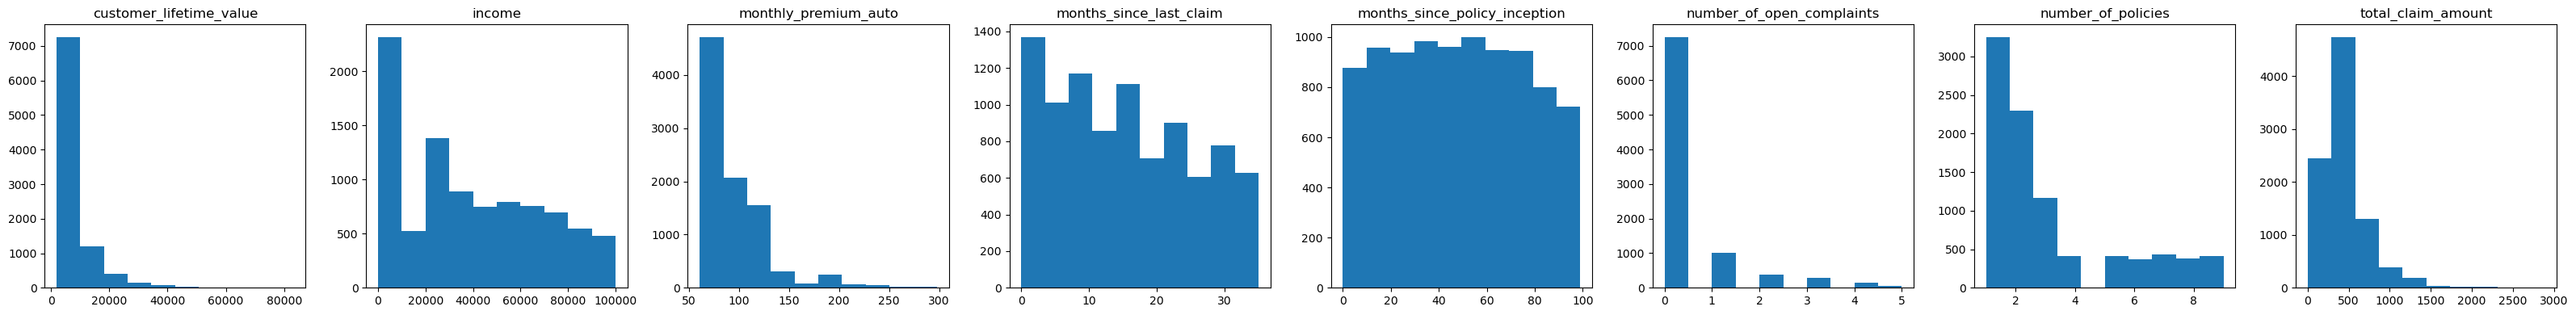

In [24]:
#Another option:
cols = data.select_dtypes(include=['float64', 'int64'], exclude=['bool']).columns
n_rows = 1
n_cols = len(cols)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 4, n_rows * 4))

for i, col in enumerate(cols):
    ax = axes[i]
    ax.hist(data[col], bins=10)
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [25]:
# total counts of categoricals 
import plotly.express as px

for col in cat_final:
    fig = px.bar(cat_final[col].value_counts(), x=cat_final[col].value_counts().index, y=cat_final[col].value_counts().values, color_discrete_sequence=['#FFC0CB'])
    
    # Add text annotations to each bar
    fig.update_traces(texttemplate='%{y}', textposition='outside')
    
    fig.update_layout(title=f'{col} Counts')
    fig.show()

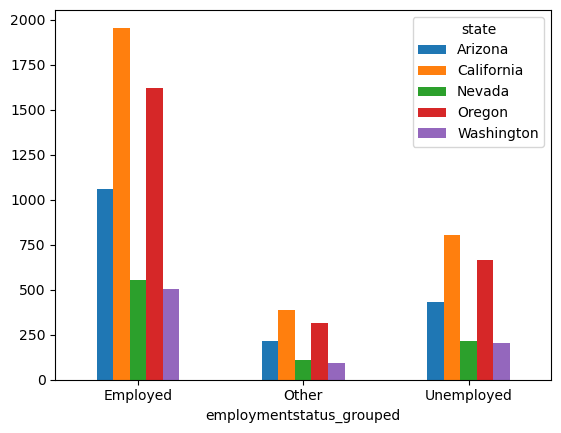

In [26]:
# Inspired by Sandra's exercise
# Let's explore the relationship between categorical variables
crosstab = pd.crosstab(cat_final.employmentstatus_grouped, cat_final.state)
barplot = crosstab.plot.bar(rot=0)

#we an see state of California and Oregon are predominant in all groups of employed and non employed.

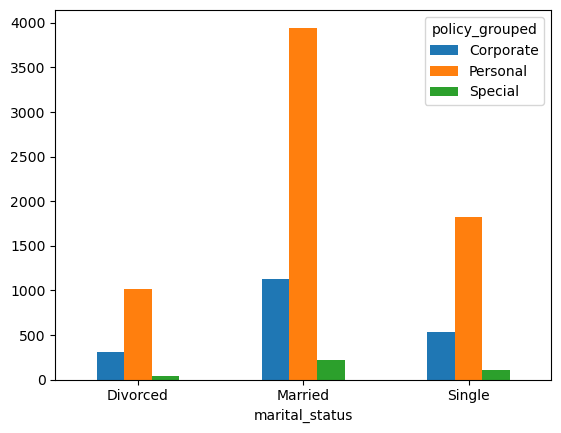

In [27]:
crosstab = pd.crosstab(cat_final.marital_status, cat_final.policy_grouped)
barplot = crosstab.plot.bar(rot=0)


### <span style="color:rgb(255, 0, 255)">--- Let's look at the outliers</span>

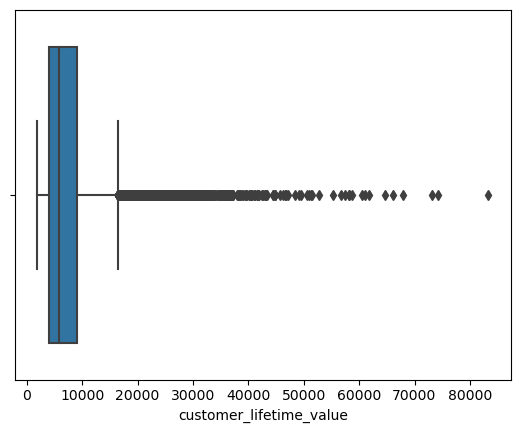

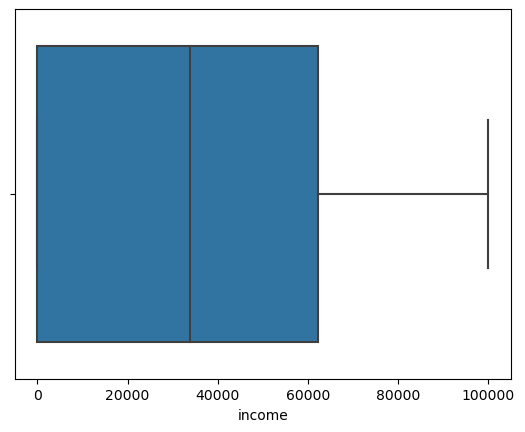

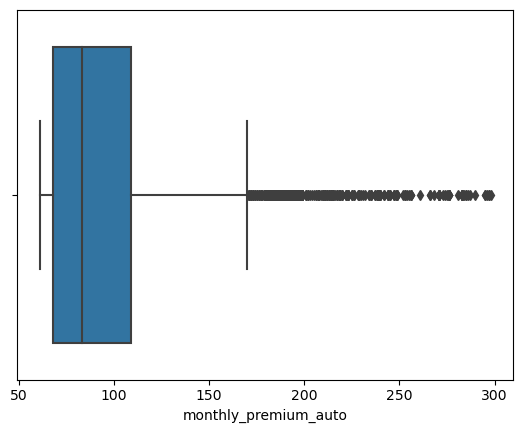

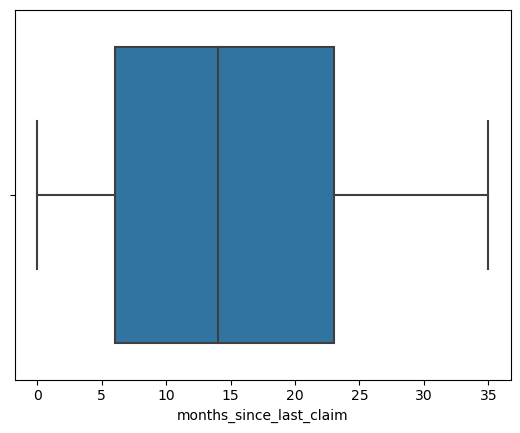

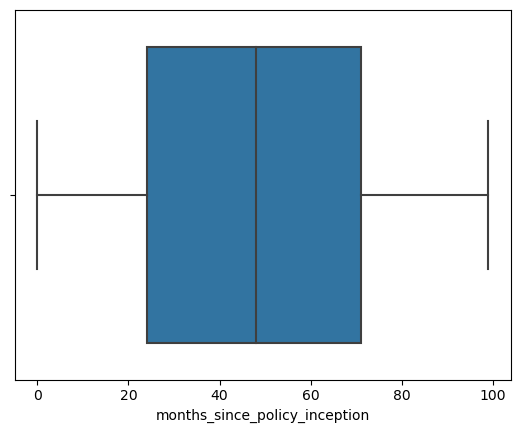

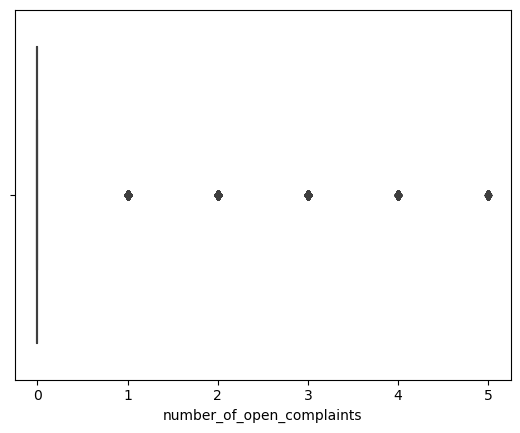

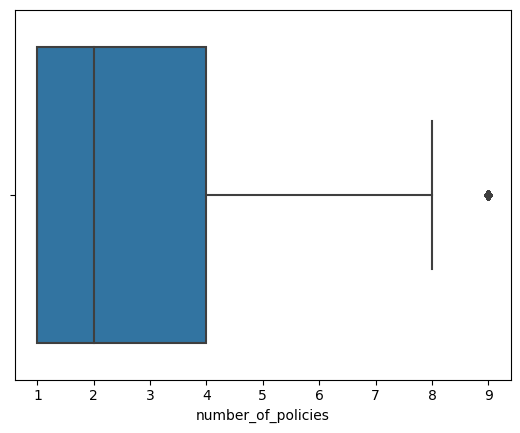

In [28]:
#Create a group of boxplots

for i, col in enumerate(num.columns):
    plt.figure(i)
    sns.boxplot(x=num[col] ,whis=1.5)

In [29]:
cat_final.head()

state response  coverage gender location_code marital_status  \
0  Washington       No     Basic      F      Suburban        Married   
1     Arizona       No  Extended      F      Suburban         Single   
2      Nevada       No   Premium      F      Suburban        Married   
3  California       No     Basic      M      Suburban        Married   
4  Washington       No     Basic      M         Rural         Single   

  renew_offer_type sales_channel vehicle_size education_grouped  \
0           Offer1         Agent      Medsize              HIGH   
1           Offer3         Agent      Medsize              HIGH   
2           Offer1         Agent      Medsize              HIGH   
3           Offer1   Call Center      Medsize              HIGH   
4           Offer1         Agent      Medsize              HIGH   

  employmentstatus_grouped vehicle_class_grouped policy_grouped  
0                 Employed          Two-Door Car      Corporate  
1               Unemployed         Four-Door Car       Personal  
2                 Employed          Two-Door Car       Personal  
3               Unemployed         Four-Door Car      Corporate  
4                 Employed         Four-Door Car       Personal

<AxesSubplot:xlabel='total_claim_amount', ylabel='vehicle_class_grouped'>

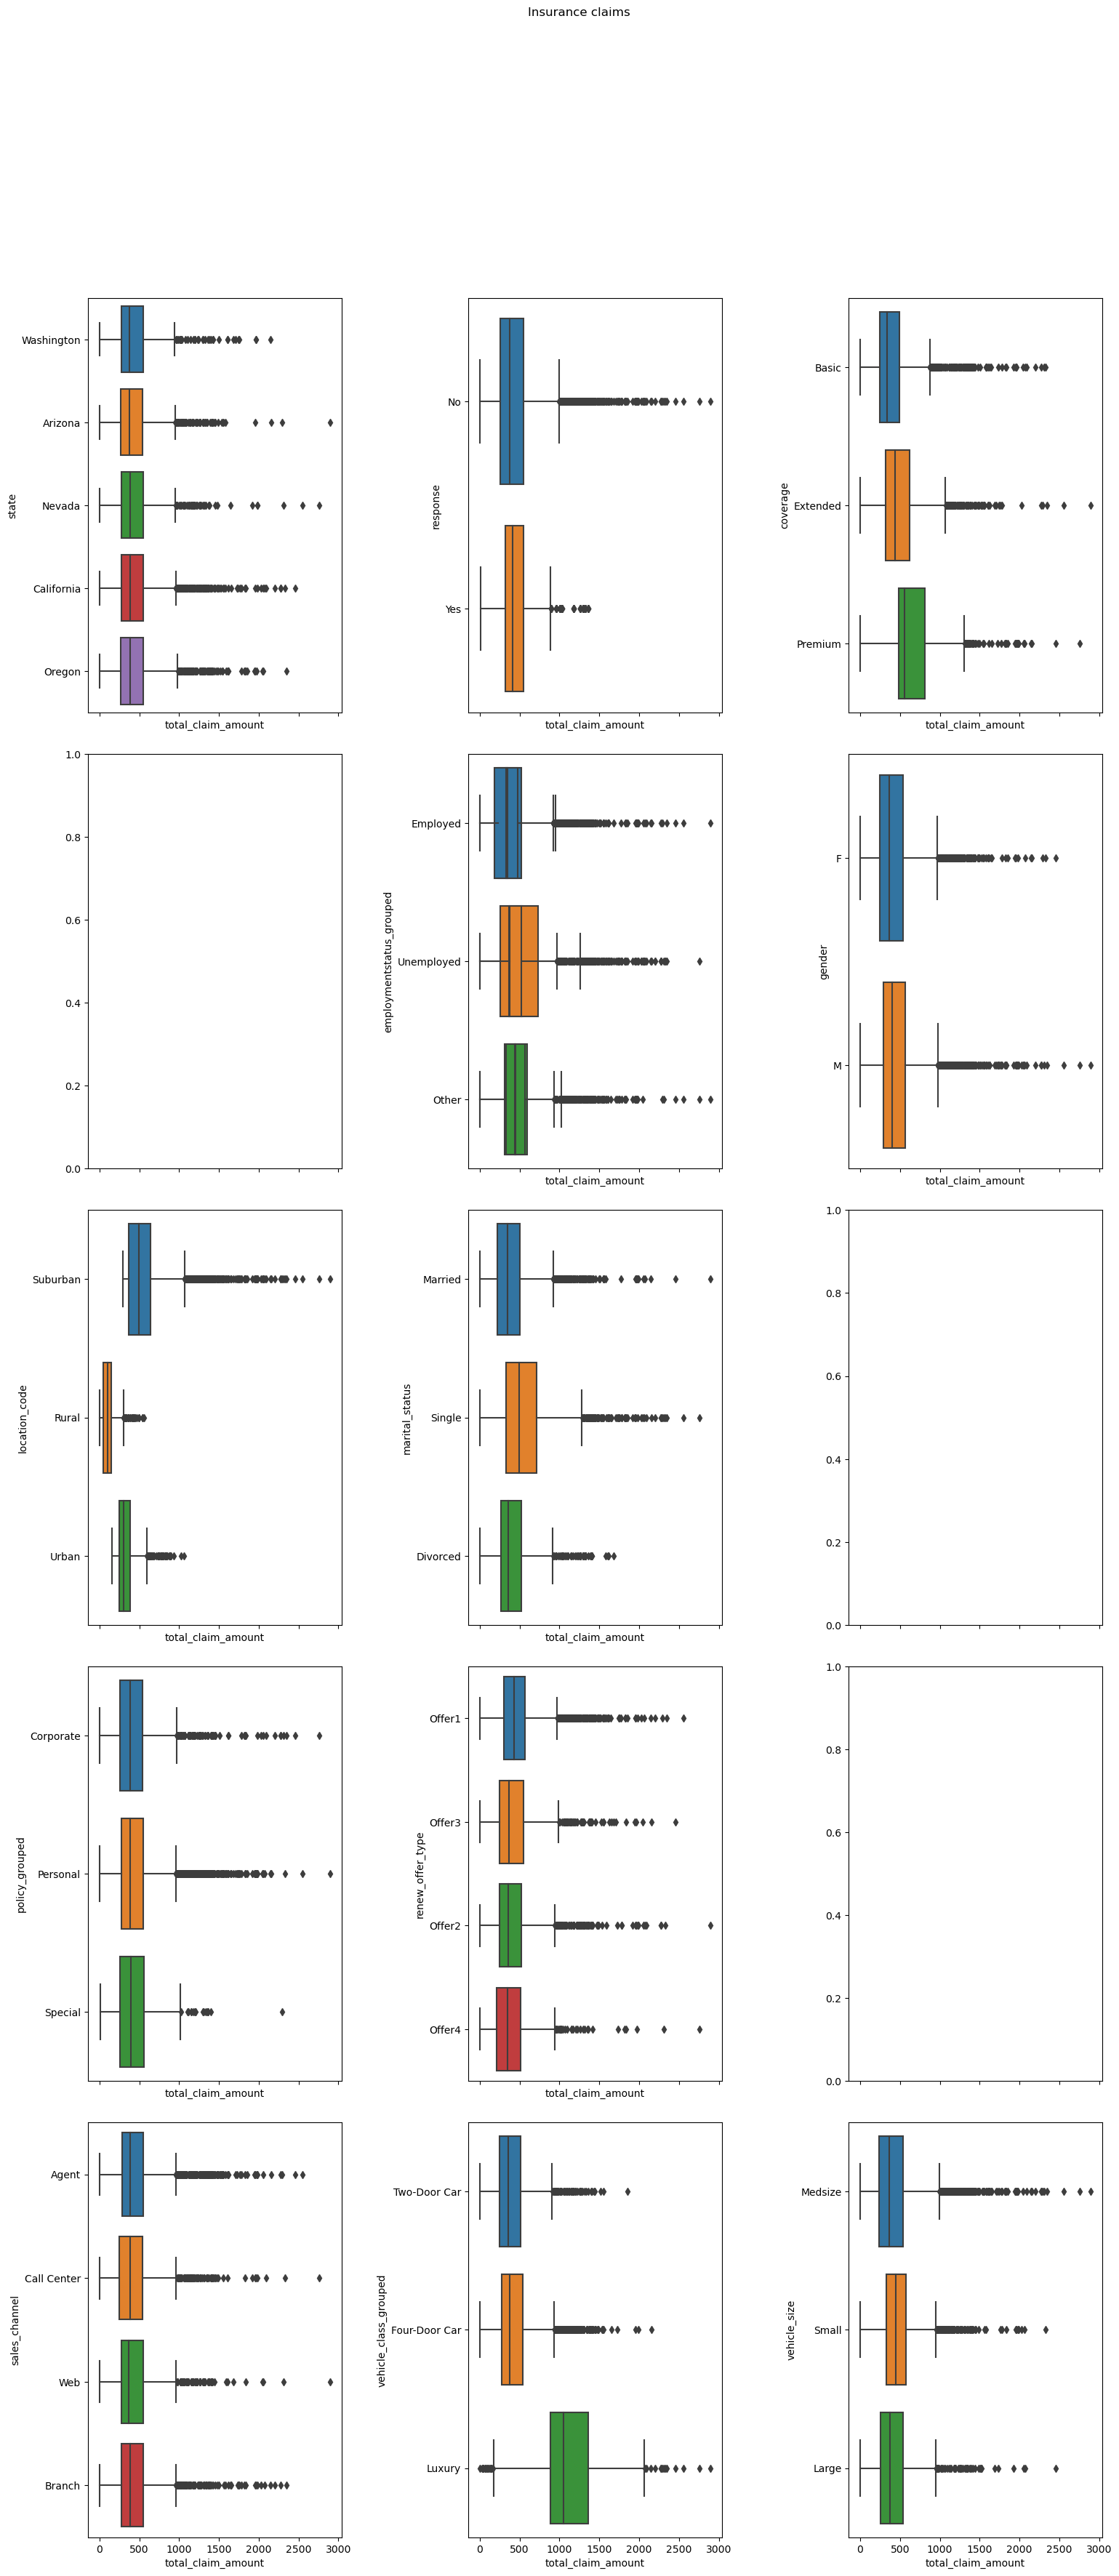

In [30]:
df_cat = pd.concat([cat_final, target], axis=1)
fig, axes = plt.subplots(5, 3, sharex=True, figsize=(18,40)) # 5 rows  x 3 columns

fig.subplots_adjust(hspace=0.1, wspace=.5) # ensure that the plots do not overlap

fig.suptitle('Insurance claims')

sns.boxplot(ax=axes[0, 0], data=df_cat, x="total_claim_amount", y="state")
sns.boxplot(ax=axes[0, 1], data=df_cat, x="total_claim_amount", y="response")
sns.boxplot(ax=axes[0, 2], data=df_cat, x="total_claim_amount", y="coverage")
sns.boxplot(ax=axes[1, 2], data=df_cat, x="total_claim_amount", y="gender")
sns.boxplot(ax=axes[2, 0], data=df_cat, x="total_claim_amount", y="location_code")
sns.boxplot(ax=axes[2, 1], data=df_cat, x="total_claim_amount", y="marital_status")
sns.boxplot(ax=axes[3, 1], data=df_cat, x="total_claim_amount", y="renew_offer_type")
sns.boxplot(ax=axes[4, 0], data=df_cat, x="total_claim_amount", y="sales_channel")
sns.boxplot(ax=axes[4, 2], data=df_cat, x="total_claim_amount", y="vehicle_size")
sns.boxplot(ax=axes[1, 1], data=df_cat, x="total_claim_amount", y="education_grouped")
sns.boxplot(ax=axes[1, 1], data=df_cat, x="total_claim_amount", y="employmentstatus_grouped")
sns.boxplot(ax=axes[3, 0], data=df_cat, x="total_claim_amount", y="policy_grouped")
sns.boxplot(ax=axes[4, 1], data=df_cat, x="total_claim_amount", y="vehicle_class_grouped")


#Source: https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

### <span style="color:rgb(255, 0, 255)">--- Remove outliers</span>

<span style="color:rgb(255, 0, 255)"> At this point we made a lot of changes in categoricals so I will create a database with this new columns

In [31]:
df = pd.concat([cat_final,num, target], axis=1)
df.head()

state response  coverage gender location_code marital_status  \
0  Washington       No     Basic      F      Suburban        Married   
1     Arizona       No  Extended      F      Suburban         Single   
2      Nevada       No   Premium      F      Suburban        Married   
3  California       No     Basic      M      Suburban        Married   
4  Washington       No     Basic      M         Rural         Single   

  renew_offer_type sales_channel vehicle_size education_grouped  \
0           Offer1         Agent      Medsize              HIGH   
1           Offer3         Agent      Medsize              HIGH   
2           Offer1         Agent      Medsize              HIGH   
3           Offer1   Call Center      Medsize              HIGH   
4           Offer1         Agent      Medsize              HIGH   

  employmentstatus_grouped vehicle_class_grouped policy_grouped  \
0                 Employed          Two-Door Car      Corporate   
1               Unemployed         Four-Door Car       Personal   
2                 Employed          Two-Door Car       Personal   
3               Unemployed         Four-Door Car      Corporate   
4                 Employed         Four-Door Car       Personal   

   customer_lifetime_value  income  monthly_premium_auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   months_since_last_claim  months_since_policy_inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   number_of_open_complaints  number_of_policies  total_claim_amount  
0                          0                   1          384.811147  
1                          0                   8         1131.464935  
2                          0                   2          566.472247  
3                          0                   7          529.881344  
4                          0                   1          138.130879

In [32]:
df.isna().sum()
# we sucessfully concat everything

state                            0
response                         0
coverage                         0
gender                           0
location_code                    0
marital_status                   0
renew_offer_type                 0
sales_channel                    0
vehicle_size                     0
education_grouped                0
employmentstatus_grouped         0
vehicle_class_grouped            0
policy_grouped                   0
customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

<span style="color:rgb(255, 0, 255)"> We shouldn't be removing outliers without any critical thinking.In this moment, the only ones that I would remove are the ones in number of policies
</span>

In [33]:
#Remove outliers
iqr = np.percentile(df['number_of_policies'],75) - np.percentile(df['number_of_policies'],25)
upper_limit = np.percentile(df['number_of_policies'],75) + 1.5*iqr
lower_limit = np.percentile(df['number_of_policies'],25) - 1.5*iqr
df = df[(df['number_of_policies']>lower_limit) & (df['number_of_policies']<upper_limit)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8718 entries, 0 to 9133
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          8718 non-null   object 
 1   response                       8718 non-null   object 
 2   coverage                       8718 non-null   object 
 3   gender                         8718 non-null   object 
 4   location_code                  8718 non-null   object 
 5   marital_status                 8718 non-null   object 
 6   renew_offer_type               8718 non-null   object 
 7   sales_channel                  8718 non-null   object 
 8   vehicle_size                   8718 non-null   object 
 9   education_grouped              8718 non-null   object 
 10  employmentstatus_grouped       8718 non-null   object 
 11  vehicle_class_grouped          8718 non-null   object 
 12  policy_grouped                 8718 non-null   o

In [34]:
# Define your function to remove outliers
def remove_outliers(dataframe, column, threshold=3):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (threshold * iqr)
    upper_bound = q3 + (threshold * iqr)
    filtered = dataframe[(dataframe[column] > lower_bound) & (dataframe[column] < upper_bound)]
    return filtered

# Apply the function to remove outliers for a specific column
#filtered_df = remove_outliers(df, 'column_name')

### <span style="color:rgb(255, 0, 255)">--- Normalize the continuous variables


In [35]:
num_df = df.select_dtypes(include = np.number)
num_df = num_df.drop(columns=['total_claim_amount']) #not include the target
cat_df = df.select_dtypes(include = np.object)
target = df['total_claim_amount']

num_df_continous = num_df.drop(['number_of_open_complaints','number_of_policies'], axis=1)
num_df_continous.head()

customer_lifetime_value  income  monthly_premium_auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   months_since_last_claim  months_since_policy_inception  
0                       32                              5  
1                       13                             42  
2                       18                             38  
3                       18                             65  
4                       12                             44

In [36]:
#Do the distributions for different continous numerical variables look like a normal distribution

transformer = MinMaxScaler().fit(num_df)
num_minmax = transformer.transform(num_df)
num_norm = pd.DataFrame(num_minmax,columns=num_df.columns)
num_normalize = num_norm.copy()

### <span style="color:rgb(255, 0, 255)">--- Encoding the categorical variables

One hot to state

One hot to marital status

One hot to policy type

One hot to policy

One hot to renew offer

One hot to sales channel

One hot vehicle class

Ordinal vehicle size

Ordinal to coverage

Ordinal to employmentstatus

Ordinal to location code

In [37]:
#For one hot we will use get dummies
cat_df_encoded1 = cat_df.copy()
cat_df_encoded1 =pd.get_dummies(cat_df_encoded1[['state','marital_status','policy_grouped','renew_offer_type','sales_channel','vehicle_class_grouped']])
cat_df_encoded1.head()

state_Arizona  state_California  state_Nevada  state_Oregon  \
0              0                 0             0             0   
1              1                 0             0             0   
2              0                 0             1             0   
3              0                 1             0             0   
4              0                 0             0             0   

   state_Washington  marital_status_Divorced  marital_status_Married  \
0                 1                        0                       1   
1                 0                        0                       0   
2                 0                        0                       1   
3                 0                        0                       1   
4                 1                        0                       0   

   marital_status_Single  policy_grouped_Corporate  policy_grouped_Personal  \
0                      0                         1                        0   
1                      1                         0                        1   
2                      0                         0                        1   
3                      0                         1                        0   
4                      1                         0                        1   

   policy_grouped_Special  renew_offer_type_Offer1  renew_offer_type_Offer2  \
0                       0                        1                        0   
1                       0                        0                        0   
2                       0                        1                        0   
3                       0                        1                        0   
4                       0                        1                        0   

   renew_offer_type_Offer3  renew_offer_type_Offer4  sales_channel_Agent  \
0                        0                        0                    1   
1                        1                        0                    1   
2                        0                        0                    1   
3                        0                        0                    0   
4                        0                        0                    1   

   sales_channel_Branch  sales_channel_Call Center  sales_channel_Web  \
0                     0                          0                  0   
1                     0                          0                  0   
2                     0                          0                  0   
3                     0                          1                  0   
4                     0                          0                  0   

   vehicle_class_grouped_Four-Door Car  vehicle_class_grouped_Luxury  \
0                                    0                             0   
1                                    1                             0   
2                                    0                             0   
3                                    1                             0   
4                                    1                             0   

   vehicle_class_grouped_Two-Door Car  
0                                   1  
1                                   0  
2                                   1  
3                                   0  
4                                   0

In [38]:
cat_df['vehicle_size'].value_counts()

Medsize    6125
Small      1692
Large       901
Name: vehicle_size, dtype: int64

In [39]:
cat_df['coverage'].value_counts()

Basic       5306
Extended    2626
Premium      786
Name: coverage, dtype: int64

In [40]:
cat_df['employmentstatus_grouped'].value_counts()

Employed      5442
Unemployed    2211
Other         1065
Name: employmentstatus_grouped, dtype: int64

In [41]:
cat_df['location_code'].value_counts()

Suburban    5508
Rural       1693
Urban       1517
Name: location_code, dtype: int64

In [42]:
# For ordinal we will asign numbers
cat_df_encoded2 = cat_df.copy()
cat_df_encoded2 ['vehicle_size_enc'] = cat_df["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})
cat_df_encoded2 ['coverage_enc'] = cat_df["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
cat_df_encoded2 ['employmentstatus_enc'] = cat_df["employmentstatus_grouped"].map({"Employed" : 0, "Unemployed" : 1, "Other": 2})
cat_df_encoded2 ['location_code_enc'] = cat_df["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
cat_df_encoded2.head()

state response  coverage gender location_code marital_status  \
0  Washington       No     Basic      F      Suburban        Married   
1     Arizona       No  Extended      F      Suburban         Single   
2      Nevada       No   Premium      F      Suburban        Married   
3  California       No     Basic      M      Suburban        Married   
4  Washington       No     Basic      M         Rural         Single   

  renew_offer_type sales_channel vehicle_size education_grouped  \
0           Offer1         Agent      Medsize              HIGH   
1           Offer3         Agent      Medsize              HIGH   
2           Offer1         Agent      Medsize              HIGH   
3           Offer1   Call Center      Medsize              HIGH   
4           Offer1         Agent      Medsize              HIGH   

  employmentstatus_grouped vehicle_class_grouped policy_grouped  \
0                 Employed          Two-Door Car      Corporate   
1               Unemployed         Four-Door Car       Personal   
2                 Employed          Two-Door Car       Personal   
3               Unemployed         Four-Door Car      Corporate   
4                 Employed         Four-Door Car       Personal   

   vehicle_size_enc  coverage_enc  employmentstatus_enc  location_code_enc  
0                 1             0                     0                  1  
1                 1             1                     1                  1  
2                 1             2                     0                  1  
3                 1             0                     1                  1  
4                 1             0                     0                  0

In [43]:
cat_df_enc_final = pd.concat([cat_df_encoded1, cat_df_encoded2], axis=1)
cat_df_enc_final = cat_df_enc_final.select_dtypes(include = np.number)
cat_df_enc_final.head()

state_Arizona  state_California  state_Nevada  state_Oregon  \
0              0                 0             0             0   
1              1                 0             0             0   
2              0                 0             1             0   
3              0                 1             0             0   
4              0                 0             0             0   

   state_Washington  marital_status_Divorced  marital_status_Married  \
0                 1                        0                       1   
1                 0                        0                       0   
2                 0                        0                       1   
3                 0                        0                       1   
4                 1                        0                       0   

   marital_status_Single  policy_grouped_Corporate  policy_grouped_Personal  \
0                      0                         1                        0   
1                      1                         0                        1   
2                      0                         0                        1   
3                      0                         1                        0   
4                      1                         0                        1   

   policy_grouped_Special  renew_offer_type_Offer1  renew_offer_type_Offer2  \
0                       0                        1                        0   
1                       0                        0                        0   
2                       0                        1                        0   
3                       0                        1                        0   
4                       0                        1                        0   

   renew_offer_type_Offer3  renew_offer_type_Offer4  sales_channel_Agent  \
0                        0                        0                    1   
1                        1                        0                    1   
2                        0                        0                    1   
3                        0                        0                    0   
4                        0                        0                    1   

   sales_channel_Branch  sales_channel_Call Center  sales_channel_Web  \
0                     0                          0                  0   
1                     0                          0                  0   
2                     0                          0                  0   
3                     0                          1                  0   
4                     0                          0                  0   

   vehicle_class_grouped_Four-Door Car  vehicle_class_grouped_Luxury  \
0                                    0                             0   
1                                    1                             0   
2                                    0                             0   
3                                    1                             0   
4                                    1                             0   

   vehicle_class_grouped_Two-Door Car  vehicle_size_enc  coverage_enc  \
0                                   1                 1             0   
1                                   0                 1             1   
2                                   1                 1             2   
3                                   0                 1             0   
4                                   0                 1             0   

   employmentstatus_enc  location_code_enc  
0                     0                  1  
1                     1                  1  
2                     0                  1  
3                     1                  1  
4                     0                  0

### <span style="color:rgb(255, 0, 255)">--- The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
</span>

In [44]:
df.head()

state response  coverage gender location_code marital_status  \
0  Washington       No     Basic      F      Suburban        Married   
1     Arizona       No  Extended      F      Suburban         Single   
2      Nevada       No   Premium      F      Suburban        Married   
3  California       No     Basic      M      Suburban        Married   
4  Washington       No     Basic      M         Rural         Single   

  renew_offer_type sales_channel vehicle_size education_grouped  \
0           Offer1         Agent      Medsize              HIGH   
1           Offer3         Agent      Medsize              HIGH   
2           Offer1         Agent      Medsize              HIGH   
3           Offer1   Call Center      Medsize              HIGH   
4           Offer1         Agent      Medsize              HIGH   

  employmentstatus_grouped vehicle_class_grouped policy_grouped  \
0                 Employed          Two-Door Car      Corporate   
1               Unemployed         Four-Door Car       Personal   
2                 Employed          Two-Door Car       Personal   
3               Unemployed         Four-Door Car      Corporate   
4                 Employed         Four-Door Car       Personal   

   customer_lifetime_value  income  monthly_premium_auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   months_since_last_claim  months_since_policy_inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   number_of_open_complaints  number_of_policies  total_claim_amount  
0                          0                   1          384.811147  
1                          0                   8         1131.464935  
2                          0                   2          566.472247  
3                          0                   7          529.881344  
4                          0                   1          138.130879

In [49]:
date = data["effective_to_date"]
df_final = pd.concat([cat_df_enc_final, num_df,target, date], axis = 1)
df_final['month']=df_final['effective_to_date'].dt.month
df_final['week']=df_final['effective_to_date'].dt.week
df_final['day']=df_final['effective_to_date'].dt.day

In [50]:
df_final = df_final.drop(['effective_to_date'], axis = 1)

In [51]:
df_final.head()

state_Arizona  state_California  state_Nevada  state_Oregon  \
0            0.0               0.0           0.0           0.0   
1            1.0               0.0           0.0           0.0   
2            0.0               0.0           1.0           0.0   
3            0.0               1.0           0.0           0.0   
4            0.0               0.0           0.0           0.0   

   state_Washington  marital_status_Divorced  marital_status_Married  \
0               1.0                      0.0                     1.0   
1               0.0                      0.0                     0.0   
2               0.0                      0.0                     1.0   
3               0.0                      0.0                     1.0   
4               1.0                      0.0                     0.0   

   marital_status_Single  policy_grouped_Corporate  policy_grouped_Personal  \
0                    0.0                       1.0                      0.0   
1                    1.0                       0.0                      1.0   
2                    0.0                       0.0                      1.0   
3                    0.0                       1.0                      0.0   
4                    1.0                       0.0                      1.0   

   policy_grouped_Special  renew_offer_type_Offer1  renew_offer_type_Offer2  \
0                     0.0                      1.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      1.0                      0.0   
3                     0.0                      1.0                      0.0   
4                     0.0                      1.0                      0.0   

   renew_offer_type_Offer3  renew_offer_type_Offer4  sales_channel_Agent  \
0                      0.0                      0.0                  1.0   
1                      1.0                      0.0                  1.0   
2                      0.0                      0.0                  1.0   
3                      0.0                      0.0                  0.0   
4                      0.0                      0.0                  1.0   

   sales_channel_Branch  sales_channel_Call Center  sales_channel_Web  \
0                   0.0                        0.0                0.0   
1                   0.0                        0.0                0.0   
2                   0.0                        0.0                0.0   
3                   0.0                        1.0                0.0   
4                   0.0                        0.0                0.0   

   vehicle_class_grouped_Four-Door Car  vehicle_class_grouped_Luxury  \
0                                  0.0                           0.0   
1                                  1.0                           0.0   
2                                  0.0                           0.0   
3                                  1.0                           0.0   
4                                  1.0                           0.0   

   vehicle_class_grouped_Two-Door Car  vehicle_size_enc  coverage_enc  \
0                                 1.0               1.0           0.0   
1                                 0.0               1.0           1.0   
2                                 1.0               1.0           2.0   
3                                 0.0               1.0           0.0   
4                                 0.0               1.0           0.0   

   employmentstatus_enc  location_code_enc  customer_lifetime_value   income  \
0                   0.0                1.0              2763.519279  56274.0   
1                   1.0                1.0              6979.535903      0.0   
2                   0.0                1.0             12887.431650  48767.0   
3                   1.0                1.0              7645.861827      0.0   
4                   0.0                0.0             